**ANÁLISE EXPLORATÓRIA**

In [221]:
#importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots


In [2]:
#importação dos dados
dados = pd.read_csv("Auto Sales data.csv", sep=",")
dados.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
# verificando o tamanho da base

dados.shape

#linhas = 2.747
#Colunas = 20

(2747, 20)

In [4]:
# vamos ver as informações sobre as colunas e os tipos de dados em cada uma delas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [ ]:
# de acordo com uma observação das colunas nos temos uma tabela onde temos os pedidos e a quantidade de itens dentro de
# um pedido, além disso seu preço único e total, como também para qual tipo de veiculo são os pedidos, e se é um pedido grande
# ou médio. Temos também os dados dos clientes.

In [5]:
# vamos verificar se temos dados nulos
dados.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [ ]:
# temos uma tabela sem dados nulos, o que significa que essa questão já foi tratada

In [6]:
# vamos verificar os dados estatisticos 
dados.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


##### dados.select_dtypes(include = ['object']).describe().T

In [ ]:
# com base nos dados descritivos podemos ter uma ideia geral de que metade dos itens vendidos não passam de 100 dolares,
# vamos imaginar que o preço está em dolar.
# na coluna sales podemos ver que cada pedido custou em média 3553 dolares, sendo o pedido de maior valor de 14.082 dolares

In [7]:
# verificando a quantidade de valores únicos por coluna

dados.nunique()

# de pronto podemos ver 298 pedidos unicos, mas temos 2747 pedidos segundo nossa análise descritivo, talvez tenhamos
# linhas duplicadas?

# podemos ver que temos 6 tipos de status, e 7 tipos de linhas de produto, 
# os pedidos foram vendidos para 19 países diferentes, e 71 cidades distribuídas nesses 19 países
# temos 89 clientes, 298 pedidos


ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1843
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
dtype: int64

In [8]:
# vamos verificar se tem linhas duplicadas

tem_duplicatas = dados.duplicated()
tem_duplicatas.value_counts()

False    2747
dtype: int64

In [9]:
# não achamos linhas duplicadas na tabela, vamos verificar se existe número de pedidos duplicados
pedidos_duplicados = dados['ORDERNUMBER'].duplicated()
pedidos_duplicados.value_counts()

True     2449
False     298
Name: ORDERNUMBER, dtype: int64

In [10]:
# nos temos pedidos duplicados vamos pegar um exemplo para olhar linha a linha e entender o porque o número do pedido se repete

duplicatas = dados[dados.duplicated(subset=['ORDERNUMBER'], keep=False)]
numeros_pedido_duplicados = duplicatas['ORDERNUMBER'].unique()
print("Numero de Pedidos duplicados:")
print(duplicatas)

Numero de Pedidos duplicados:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  

In [11]:
dados.loc[dados['ORDERNUMBER'] == 10134]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
52,10134,27,122.51,5,3307.77,01/07/2018,753,Shipped,Motorcycles,118,S10_2016,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
76,10134,31,226.58,4,7023.98,01/07/2018,777,Shipped,Motorcycles,193,S10_4698,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Large
228,10134,20,135.56,1,2711.20,01/07/2018,929,Shipped,Motorcycles,150,S12_2823,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Small
775,10134,30,61.78,6,1853.40,01/07/2018,1476,Shipped,Motorcycles,60,S18_2625,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Small
1417,10134,35,93.54,3,3273.90,01/07/2018,2118,Shipped,Motorcycles,112,S24_1578,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
1512,10134,43,83.03,7,3570.29,01/07/2018,2213,Shipped,Motorcycles,76,S24_2000,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium


In [12]:
dados.loc[dados['ORDERNUMBER'] == 10107]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
50,10107,39,99.91,5,3896.49,24/02/2018,878,Shipped,Motorcycles,118,S10_2016,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium
74,10107,27,224.65,4,6065.55,24/02/2018,902,Shipped,Motorcycles,193,S10_4698,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium
226,10107,21,144.60,1,3036.60,24/02/2018,1054,Shipped,Motorcycles,150,S12_2823,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium
773,10107,29,70.87,6,2055.23,24/02/2018,1601,Shipped,Motorcycles,60,S18_2625,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1415,10107,25,113.83,3,2845.75,24/02/2018,2243,Shipped,Motorcycles,112,S24_1578,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1510,10107,38,83.03,7,3155.14,24/02/2018,2338,Shipped,Motorcycles,76,S24_2000,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium
2104,10107,20,92.90,8,1858.00,24/02/2018,2932,Shipped,Motorcycles,99,S32_1374,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small


In [39]:
dados.loc[dados['ORDERNUMBER'] == 10121]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
227,10121,50,165.68,4,8284.00,07/05/2018,983,Shipped,Motorcycles,150,S12_2823,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Large
1612,10121,32,76.88,2,2460.16,07/05/2018,2368,Shipped,Motorcycles,69,S24_2360,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2257,10121,25,86.74,3,2168.50,07/05/2018,3013,Shipped,Motorcycles,102,S32_4485,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2361,10121,44,74.85,1,3293.40,07/05/2018,3117,Shipped,Motorcycles,81,S50_4713,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Medium


In [ ]:
# pegamos 3 números de pedidos que se repetem e observamos que eles tem um ponto em comum
# todo pedido que se repete aconteceram na mesma data
# isso significa que, cada linha de pedido duplicado se refere a um produto distinto com uma quantidade X desse mesmo produto
# podemos concluir que não há uma incosistencia nos dados

In [14]:
# agora vamos verificar as colunas com dados categoricos para ver se precisam de algum tratamento

#STATUS
#PRODUCTLINE
#COUNTRY
#CUSTOMERNAME

In [15]:
dados['STATUS'].value_counts()

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [16]:
dados['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [119]:
dados['COUNTRY'].value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [19]:
dados['CUSTOMERNAME'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64

In [ ]:
#Verificamos que não existe nenhum dados nessas colunas que precisa ser formatado

In [20]:
# com tudo que observamos o unico tratamento que precisamos fazer é no tipo das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [21]:
dados['ORDERNUMBER'] = dados['ORDERNUMBER'].astype('object')
dados['MSRP'] = dados['MSRP'].astype('float')
dados['ORDERDATE'] = pd.to_datetime(dados['ORDERDATE'], format='%d/%m/%Y')

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   object        
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   float64       
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [23]:
dados.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95.0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95.0,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95.0,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95.0,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95.0,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [24]:
#vamos verificar a data do pedido mais antigo e o mais atual para ter ideia da linha do tempo da nossa base

print("Min Date: ", dados['ORDERDATE'].min())
print("Max Date: ", dados['ORDERDATE'].max())

#nossa base vai de 2018 a 2020

Min Date:  2018-01-06 00:00:00
Max Date:  2020-05-31 00:00:00


In [120]:
#vamos criar colunas de Ano, Mes, Trimestre e Semana, para entender os dados por periodo

dados['ANO'] = dados['ORDERDATE'].dt.year
dados['MES'] = dados['ORDERDATE'].dt.month
dados['SEMANA'] = dados['ORDERDATE'].dt.isocalendar().week
dados['TRIMESTRE'] = dados['ORDERDATE'].dt.quarter

**VISUALIZAÇÕES GRÁFICAS**

----------------------------------------------------------------------------
----------------------------------------------------------------------------


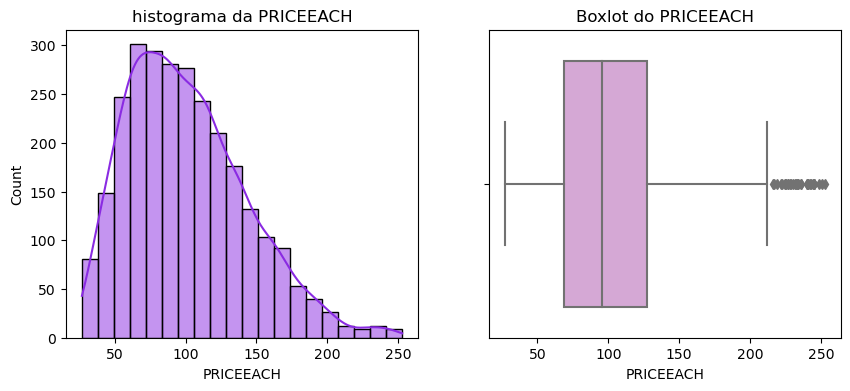

In [54]:
#Vamos entender a distribuição dos nossos dados de maneira gráfica para a coluna de preços
colunas = dados[['PRICEEACH',]]
def graficos(coluna, bins):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # HISTOGRAMA
    print("----------------------------------------------------------------------------")
    sns.histplot(dados[coluna], bins=bins, kde=True, ax=axes[0], color = '#8A2BE2')
    axes[0].set_title("histograma da " + coluna)
    # BOXPLOT
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=dados[coluna], ax=axes[1],color = '#DDA0DD')
    axes[1].set_title("Boxlot do " + coluna )
    plt.show()
for x in colunas:
    graficos(x,20)

----------------------------------------------------------------------------
----------------------------------------------------------------------------


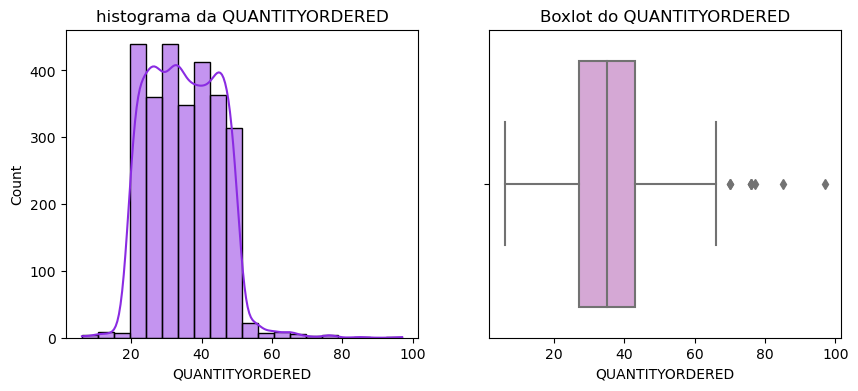

In [53]:
#Vamos entender a distribuição dos nossos dados de maneira gráfica para a coluna de quantidade de itens do pedido
colunas = dados[['QUANTITYORDERED',]]
def graficos(coluna, bins):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # HISTOGRAMA
    print("----------------------------------------------------------------------------")
    sns.histplot(dados[coluna], bins=bins, kde=True, ax=axes[0], color = '#8A2BE2')
    axes[0].set_title("histograma da " + coluna)
    # BOXPLOT
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=dados[coluna], ax=axes[1], color = '#DDA0DD')
    axes[1].set_title("Boxlot do " + coluna )
    plt.show()
for x in colunas:
    graficos(x,20)

In [ ]:
#Com base nas visualizações que criamos podemos observar que:
# 1 - boa parte dos itens comprados custam de 80 a 120 doláres
# 2 - boa parte dos pedidos contem de 20 a 50 itens, por pedido

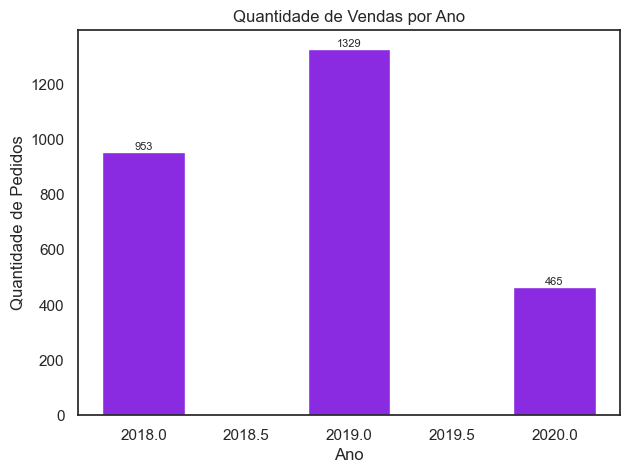

In [108]:
#Vamos entender a quantidade de vendas por ano
vendas_por_ano = dados.groupby('ANO')['ORDERNUMBER'].count()
plt.figure(figsize=(7, 5))
plt.bar(vendas_por_ano.index, vendas_por_ano.values, color = "#8A2BE2", width=0.4)

for ano, quantidade in zip(vendas_por_ano.index, vendas_por_ano.values):
    plt.text(ano, quantidade, str(quantidade), ha='center', va='bottom',fontsize=8)
    
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Vendas por Ano')
plt.show()

In [ ]:
# O ano que mais tivemos vendas foi 2019, 2020 não temos os dados do ano inteiro

In [ ]:
#Vamos entender a quantidade de vendas por ano
vendas_por_ano = dados.groupby('ANO')['ORDERNUMBER'].count()
plt.figure(figsize=(7, 5))
plt.bar(vendas_por_ano.index, vendas_por_ano.values, color = "#8A2BE2", width=0.4)

for ano, quantidade in zip(vendas_por_ano.index, vendas_por_ano.values):
    plt.text(ano, quantidade, str(quantidade), ha='center', va='bottom',fontsize=8)
    
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Vendas por Ano')
plt.show()

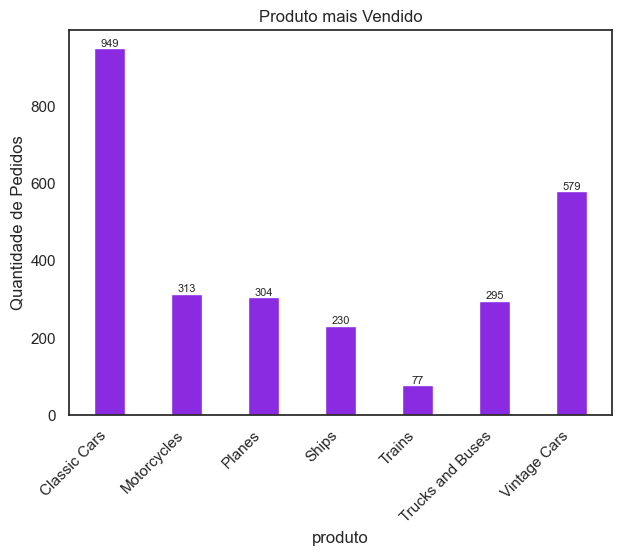

In [107]:
#vamos verificar qual a linha de produto mais vendida

prod_mais_vendido = dados.groupby('PRODUCTLINE')['ORDERNUMBER'].count()
plt.figure(figsize=(7, 5))
plt.bar(prod_mais_vendido.index, prod_mais_vendido.values, color = "#8A2BE2", width=0.4)

for produto, quantidade in zip(prod_mais_vendido.index, prod_mais_vendido.values):
    plt.text(produto, quantidade, str(quantidade), ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right')   
plt.xlabel('produto')
plt.ylabel('Quantidade de Pedidos')
plt.title('Produto mais Vendido')
plt.show()

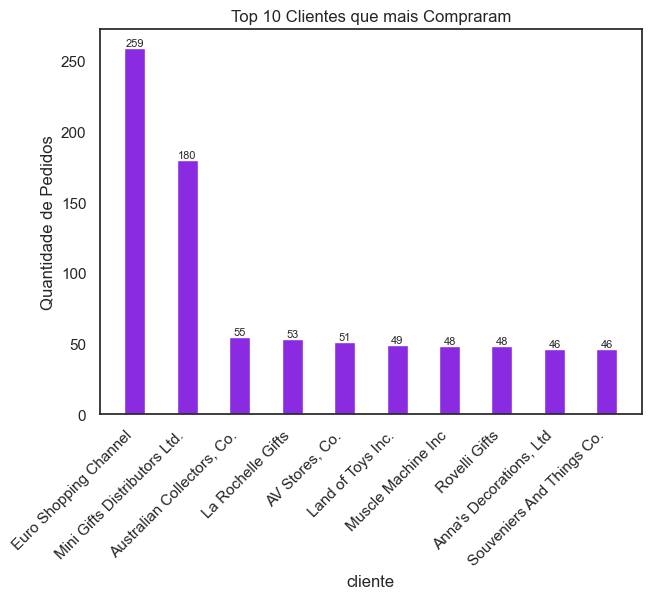

In [106]:
#vamos verificar agora qual o cliente que mais compra 

cliente_mais_comprou = dados.groupby('CUSTOMERNAME')['ORDERNUMBER'].count()
top_10_clientes = cliente_mais_comprou.sort_values(ascending=False).head(10)
plt.figure(figsize=(7, 5))
plt.bar(top_10_clientes.index, top_10_clientes.values, color = "#8A2BE2", width=0.4)

for cliente, quantidade in zip(top_10_clientes.index, top_10_clientes.values):
    plt.text(cliente, quantidade, str(quantidade), ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right')   
plt.xlabel('cliente')
plt.ylabel('Quantidade de Pedidos')
plt.title('Top 10 Clientes que mais Compraram')
plt.show()

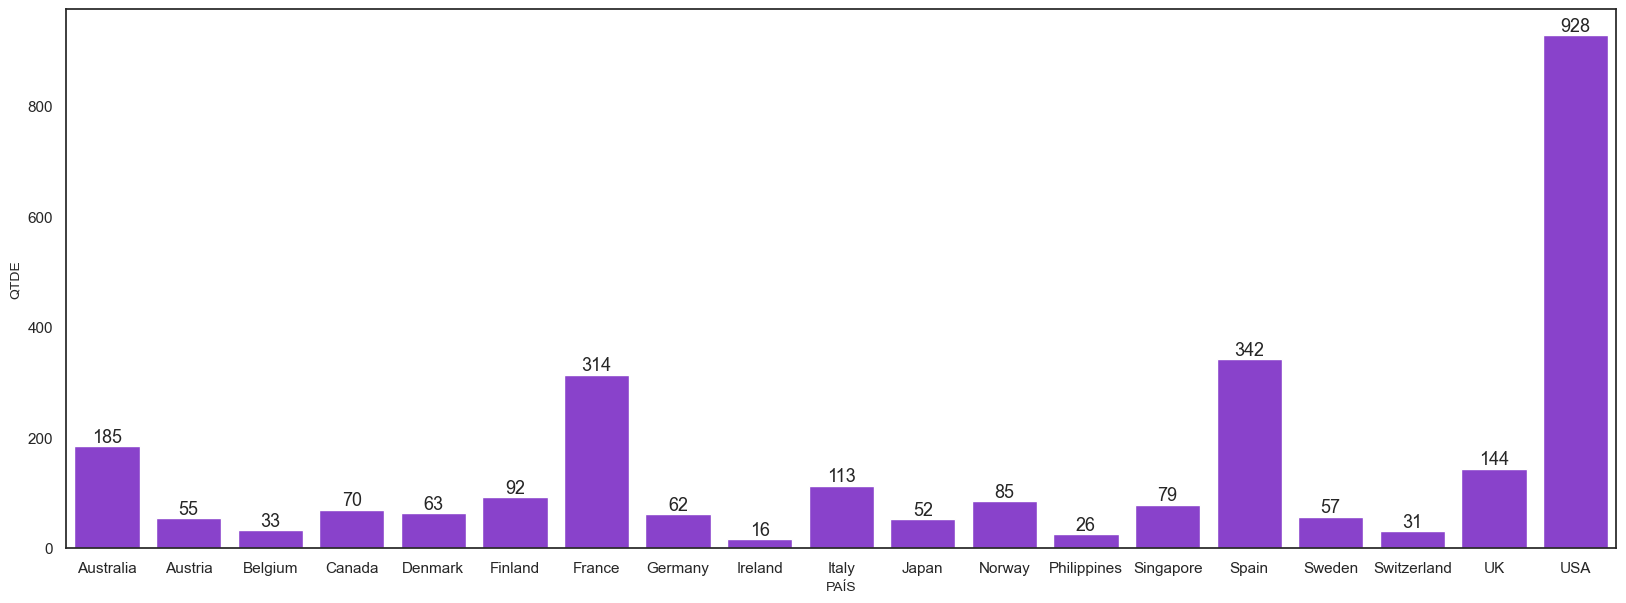

In [118]:
#vamos verificar agora qual o país que mais compra 

país_mais_comprou = dados.groupby('COUNTRY')['ORDERNUMBER'].count()
país_mais_comprou = pd.DataFrame(país_mais_comprou)
país_mais_comprou = país_mais_comprou.rename(columns={'ORDERNUMBER': 'QTDE'})
país_mais_comprou.reset_index(inplace=True)  # Resetando o índice

cores = ["#8A2BE2"]
sns.set(style="white", rc={"figure.figsize": (20, 7)})
sns.barplot(data=país_mais_comprou, x="COUNTRY", y="QTDE", palette=cores, errorbar=None)
plt.ylabel("QTDE", fontsize=10)
plt.xlabel("PAÍS", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=13)

plt.show()

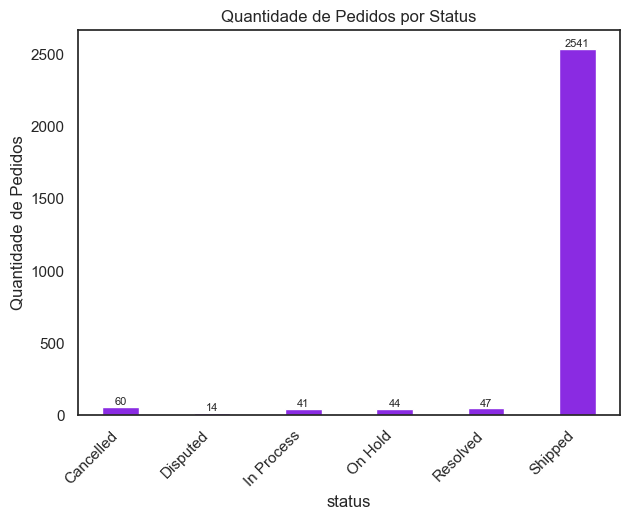

In [109]:
#vamos verificar como está o status dos pedidos

status = dados.groupby('STATUS')['ORDERNUMBER'].count()
plt.figure(figsize=(7, 5))
plt.bar(status.index, status.values, color = "#8A2BE2", width=0.4)

for status, quantidade in zip(status.index, status.values):
    plt.text(status, quantidade, str(quantidade), ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=45, ha='right')   
plt.xlabel('status')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Pedidos por Status')
plt.show()

In [66]:
#vamos ver agora qual foi o categoria de produto mais comprado pelos paises que mais compraram

#lista com 10 paises que mais compraram
país_mais_comprou = dados.groupby('COUNTRY')['ORDERNUMBER'].count()
top_10_paises = país_mais_comprou.sort_values(ascending=False).head(10)
df_top_10 = pd.DataFrame(top_10_paises)
df_top_10.head()
lista_top_10_paises = df_top_10.index.tolist()
print(lista_top_10_paises)

#tabela rankeando produto mais vendido por pais
vendas_por_pais_produto = dados.groupby(['COUNTRY', 'PRODUCTLINE'])['ORDERNUMBER'].count().reset_index()
#vendas_por_pais_produto.head()

#produto mais comprado por país
produto_mais_comprado = vendas_por_pais_produto.loc[vendas_por_pais_produto.groupby('COUNTRY')['ORDERNUMBER'].idxmax()]

#tabela com produto mais comprado nos 10 paises que mais compraram
top_10_paises = produto_mais_comprado[produto_mais_comprado['COUNTRY'].isin(lista_top_10_paises)]
produto_top_10_paises = top_10_paises.sort_values(by='ORDERNUMBER', ascending=False)

vendas_anual.reset_index(inplace=True)  # Resetando o índice
produto_top_10_paises.head(10)

['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland', 'Norway', 'Singapore', 'Canada']


,COUNTRY,PRODUCTLINE,ORDERNUMBER
109,USA,Classic Cars,311
87,Spain,Classic Cars,120
37,France,Classic Cars,98
6,Australia,Vintage Cars,58
102,UK,Classic Cars,46
63,Italy,Vintage Cars,41
30,Finland,Classic Cars,38
71,Norway,Classic Cars,35
81,Singapore,Classic Cars,32
22,Canada,Trucks and Buses,16


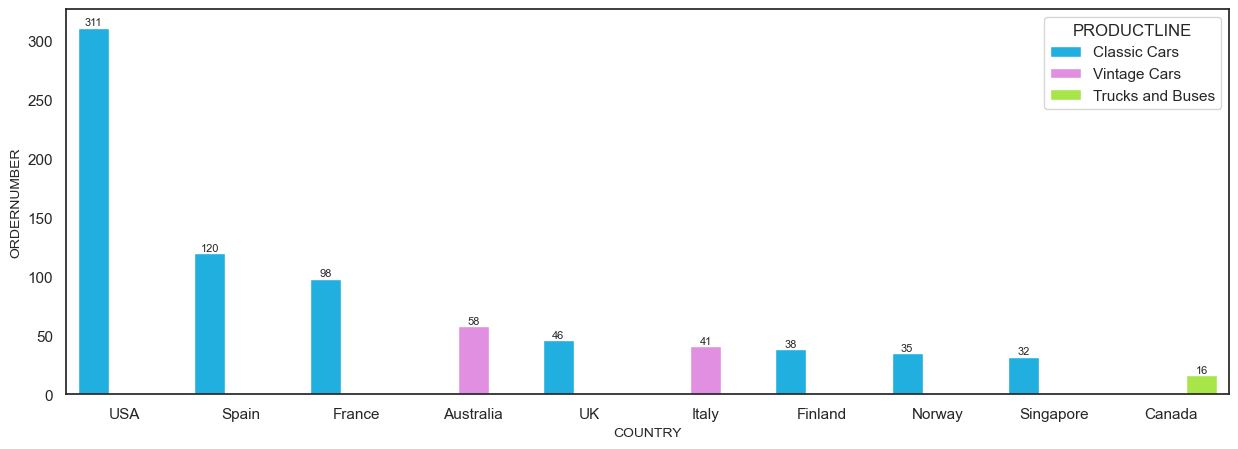

In [114]:
#visualização grafica da nossa tabela rankeando os paises e a linha de produto que mais comprou
cores = ["#00BFFF", "#EE82EE", "#ADFF2F"]
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=produto_top_10_paises, x="COUNTRY", y="ORDERNUMBER", hue="PRODUCTLINE", palette=cores, errorbar=None)
plt.ylabel("ORDERNUMBER", fontsize=10)
plt.xlabel("COUNTRY", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)

plt.show()

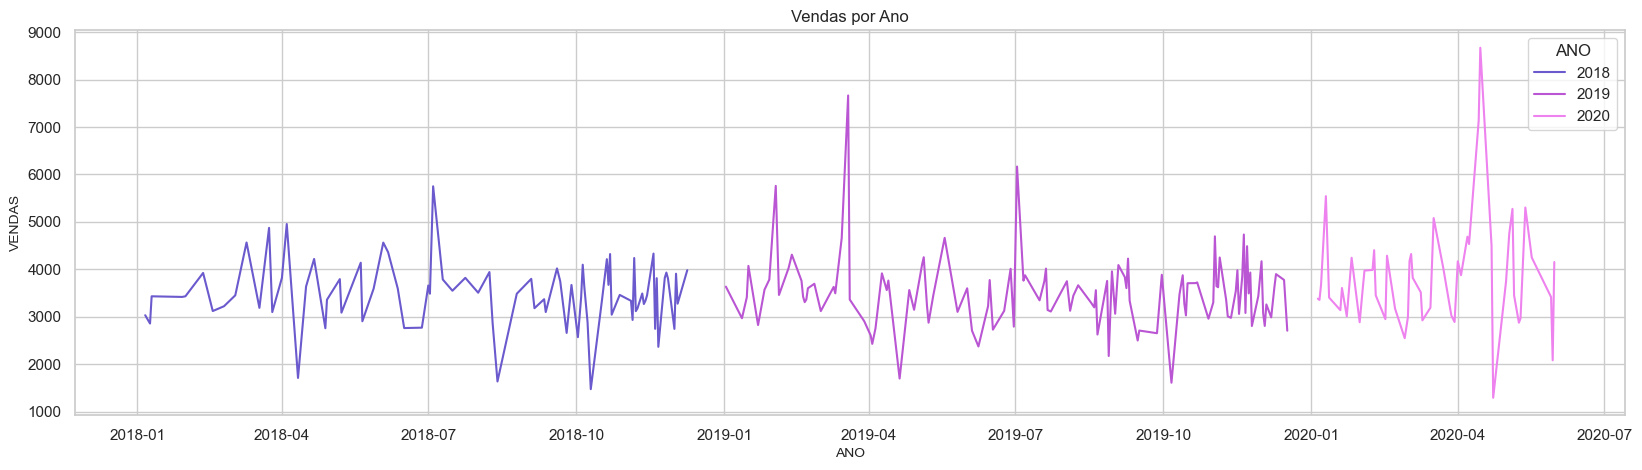

In [143]:
#Vendas por Ano

cores = ["#6A5ACD", "#BA55D3", "#EE82EE", "#00FFFF", "#00FF7F"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=dados, x="ORDERDATE", y="SALES", errorbar=None, hue="ANO",palette=sns.color_palette(cores, len(dados['ANO'].unique())))
plt.title("Vendas por Ano")
plt.xlabel("ANO", fontsize=10)
plt.ylabel("VENDAS", fontsize=10)
plt.legend(title="ANO", loc='best')
plt.show()

In [261]:
#Vamos verficar o tamanho dos pedidos por cada ano

anos = [2018, 2019, 2020]
deal_ano = dados.groupby(['ANO', 'DEALSIZE'])['ORDERNUMBER'].count().reset_index()
deal_ano = deal_ano.rename(columns = {'ORDERNUMBER': 'Quantidade'})
deal_ano = pd.DataFrame(deal_ano)

def grafico(anos):
    cores = ["#6A5ACD", "#BA55D3", "#EE82EE"]
    dados_ano = deal_ano[deal_ano['ANO'] == anos]
   
    fig = px.pie(dados_ano, values='Quantidade', names='DEALSIZE', 
                 title=f'Tamanho do Pedido por Ano em {anos}', 
                 color_discrete_sequence=cores)
    fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1])
    fig.update_layout(height=400, width=3* 250, showlegend=False)
    fig.show()

for x in anos:
    grafico(x)
plt.show()

In [ ]:
#baseado nas informações do gráfico podemos notar que os pedidos variam entre pequenos e médio, raramente temos um pedido grande

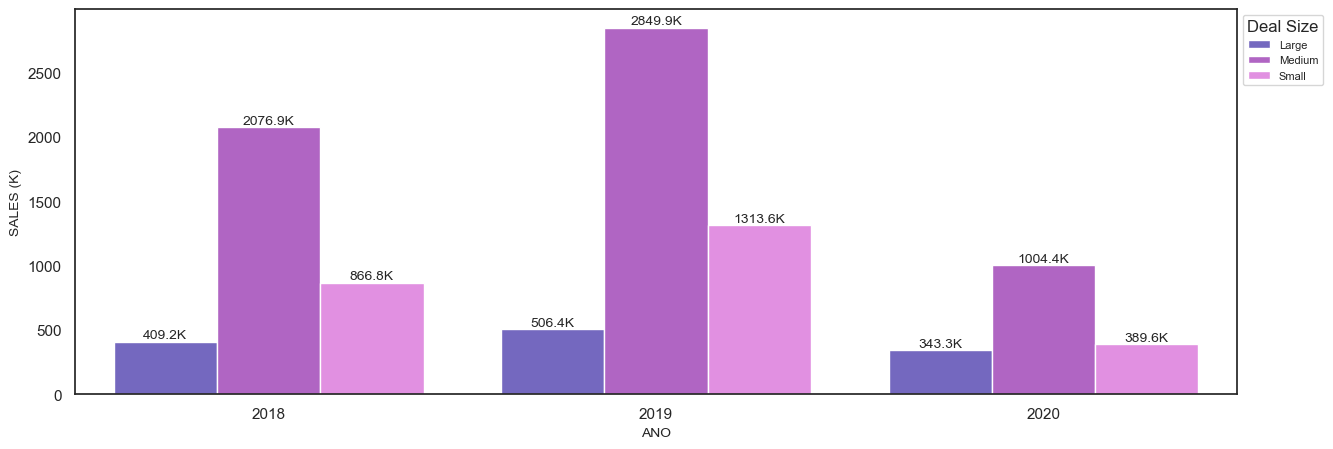

In [276]:
# vamos verificar agora a receita gerada por tamanho de pedido em cada ano
cores = ["#6A5ACD", "#BA55D3", "#EE82EE"]
deal_ano = dados.groupby(['ANO', 'DEALSIZE'])['SALES'].sum().reset_index()
deal_ano = deal_ano.rename(columns = {'SALES': 'SALES'})
deal_ano = pd.DataFrame(deal_ano)


sns.set(style = "white", rc={"figure.figsize":(15,5)})
deal_ano["SALES (K)"] = deal_ano["SALES"]/1000
sns.barplot(data=deal_ano, x = "ANO", y = "SALES (K)", hue = "DEALSIZE", palette = cores, errorbar=None)
plt.ylabel("SALES (K)", fontsize = 10)
plt.xlabel("ANO", fontsize = 10)
for x in plt.gca().patches:
    plt.gca().annotate(f'{x.get_height():.1f}K', (x.get_x() + x.get_width()/ 2., x.get_height()), ha ='center', va='bottom', fontsize=10)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#podemos ver pelo grafico que os pedidos de tamanho médio foram os que mais trouxeram receita

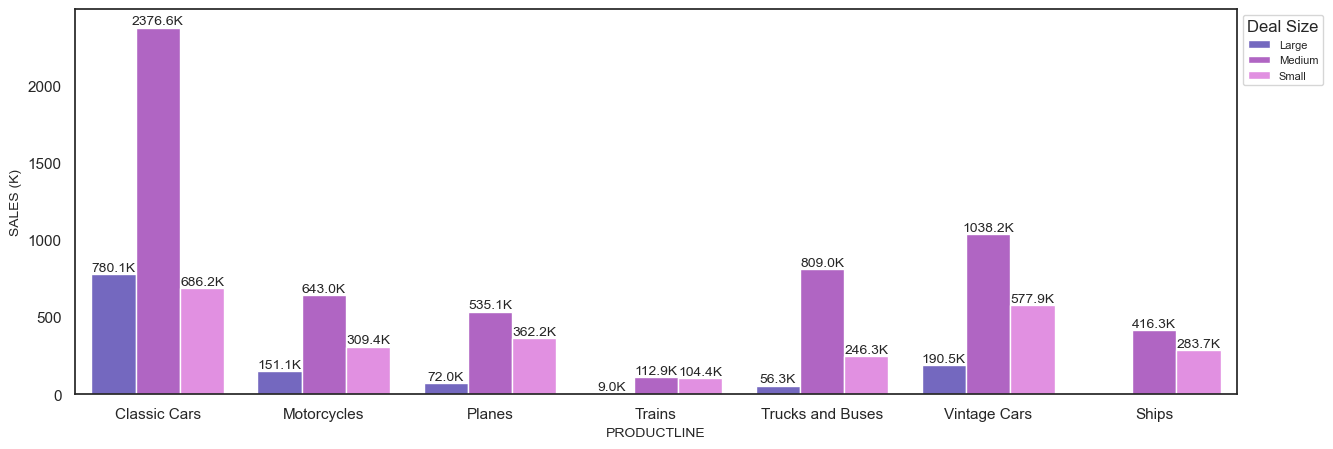

In [281]:
# vamos verificar a linha de produto  por tamanho do pedido
cores = ["#6A5ACD", "#BA55D3", "#EE82EE"]
deal_prod = dados.groupby(['DEALSIZE', 'PRODUCTLINE' ])['SALES'].sum().reset_index()
deal_prod = deal_prod.rename(columns = {'SALES': 'SALES'})
deal_prod = pd.DataFrame(deal_prod)


sns.set(style = "white", rc={"figure.figsize":(15,5)})
deal_prod["SALES (K)"] = deal_prod["SALES"]/1000
sns.barplot(data=deal_prod, x = "PRODUCTLINE", y = "SALES (K)", hue = "DEALSIZE", palette = cores, errorbar=None)
plt.ylabel("SALES (K)", fontsize = 10)
plt.xlabel("PRODUCTLINE", fontsize = 10)
for x in plt.gca().patches:
    plt.gca().annotate(f'{x.get_height():.1f}K', (x.get_x() + x.get_width()/ 2., x.get_height()), ha ='center', va='bottom', fontsize=10)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

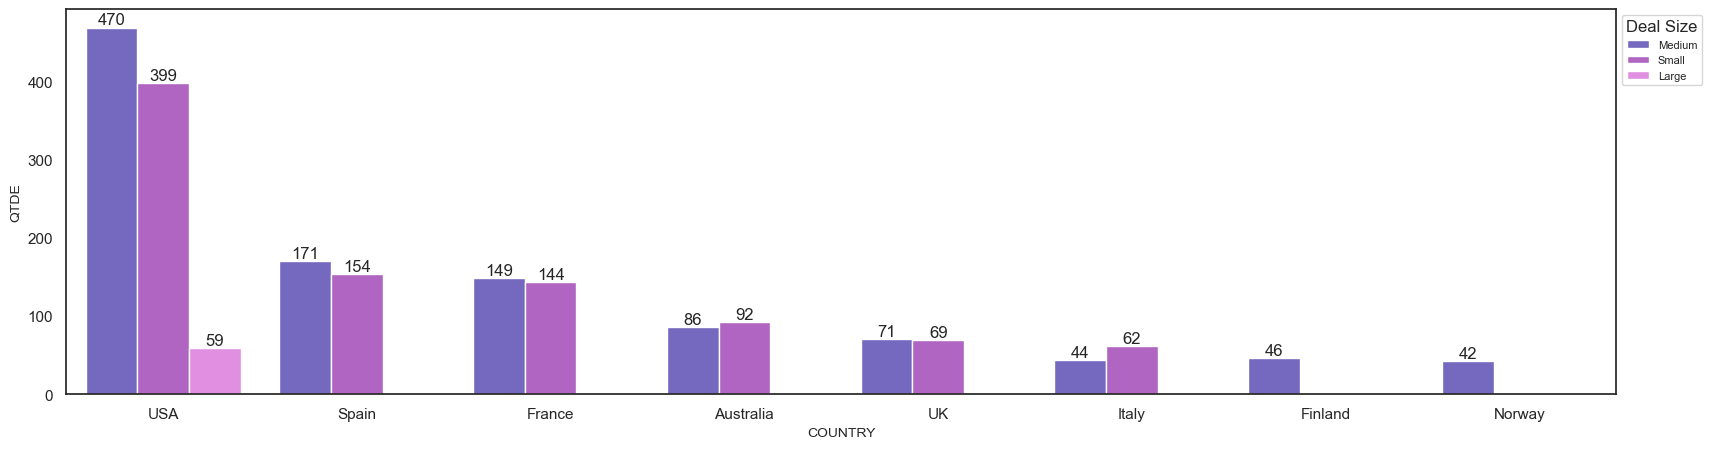

In [302]:
#vamos verificar qual pais faz mais pedidos de tamanho médio

cores = ["#6A5ACD", "#BA55D3", "#EE82EE"]
deal_pais = dados.groupby(['DEALSIZE', 'COUNTRY' ])['ORDERNUMBER'].count().reset_index()
deal_pais = deal_pais.rename(columns = {'ORDERNUMBER': 'QTDE'})
deal_pais = deal_pais.groupby(['DEALSIZE', 'COUNTRY' ])['QTDE'].sum().sort_values(ascending=False).head(15).reset_index()
deal_pais = pd.DataFrame(deal_pais)


sns.set(style = "white", rc={"figure.figsize":(20,5)})

sns.barplot(data=deal_pais, x = "COUNTRY", y = "QTDE", hue = "DEALSIZE", palette = cores, errorbar=None)
plt.ylabel("QTDE", fontsize = 10)
plt.xlabel("COUNTRY", fontsize = 10)
for x in plt.gca().patches:
    plt.gca().annotate(f'{x.get_height():.0f}', (x.get_x() + x.get_width()/ 2., x.get_height()), ha ='center', va='bottom', fontsize=12)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


**CONCLUSÕES**